In [1]:
from diffusion import diff_model, diffusion_process
from modules import UNET
from trainer import diffusion_trainer
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
import datetime
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

IMPORTING DATA and TRAINING

In [2]:
from torchvision.transforms.autoaugment import TrivialAugmentWide
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

#To speed up training, we'll only train on deer images for this demo.
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
deer_idxs = np.where((np.array(trainset.targets) == 4))[0]
deerset = torch.utils.data.Subset(trainset, deer_idxs)

Files already downloaded and verified


In [3]:
#Create model and trainer object
model = UNET(3)
config = diffusion_trainer.get_default_config()
trainer = diffusion_trainer(config, model, deerset)


running on device cuda


In [4]:
trainer.run(1000) #train for 1000 epochs

iter_dt 323.91ms; iter 100: train loss 0.16526
iter_dt 328.15ms; iter 200: train loss 0.11643
iter_dt 340.86ms; iter 300: train loss 0.08795
iter_dt 326.06ms; iter 400: train loss 0.09171
iter_dt 342.85ms; iter 500: train loss 0.09006
iter_dt 347.04ms; iter 600: train loss 0.04353
iter_dt 337.90ms; iter 700: train loss 0.06196
iter_dt 373.14ms; iter 800: train loss 0.03400
iter_dt 352.68ms; iter 900: train loss 0.03852
iter_dt 373.11ms; iter 1000: train loss 0.06565
iter_dt 368.68ms; iter 1100: train loss 0.03825
iter_dt 341.49ms; iter 1200: train loss 0.04359
iter_dt 340.98ms; iter 1300: train loss 0.03098
iter_dt 368.27ms; iter 1400: train loss 0.04390
iter_dt 356.33ms; iter 1500: train loss 0.04383
iter_dt 339.93ms; iter 1600: train loss 0.02340
iter_dt 341.32ms; iter 1700: train loss 0.03527
iter_dt 344.75ms; iter 1800: train loss 0.06042
iter_dt 394.21ms; iter 1900: train loss 0.04114
iter_dt 371.36ms; iter 2000: train loss 0.05428
iter_dt 371.93ms; iter 2100: train loss 0.02326
i

In [5]:
torch.save(model.state_dict(), '1000epochs_3contractinglayers')

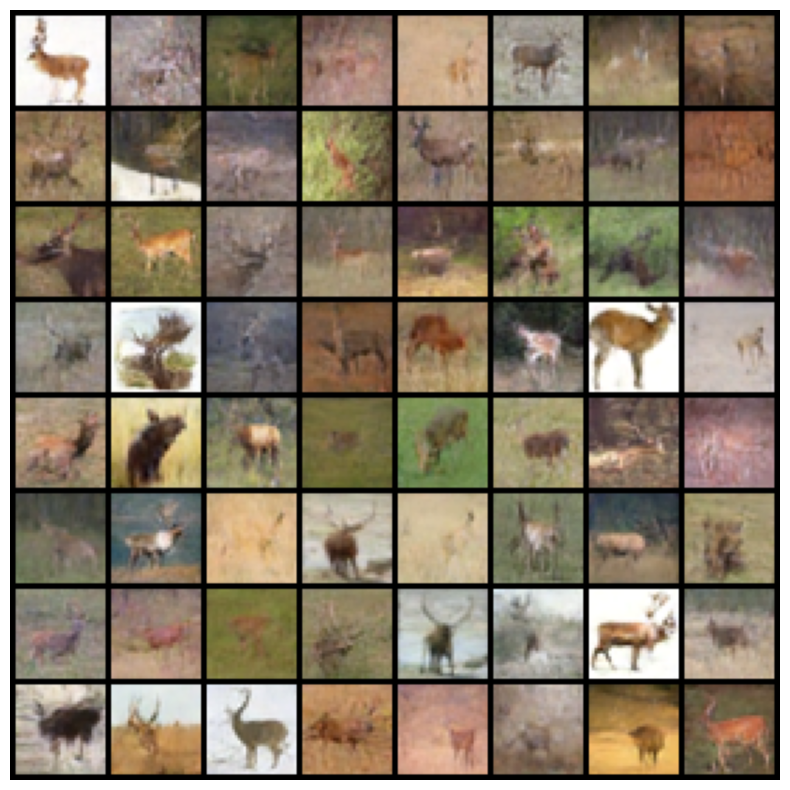

In [20]:
#from diffusion import diff_model, diffusion_process

dif_proc = diffusion_process(config['timesteps'], config['beta_0'], config['beta_T'])
dif_mod = diff_model(dif_proc, model, 'cuda')

sampled_images = dif_mod.generate(64)

def imshow(img, title="", unnormalize = False):
    if unnormalize:
      img = img / 2 + 0.5     # unnormalize
    img = img.numpy()
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(sampled_images.cpu()))